In [4]:
from pathlib import Path
this_file = Path('.').resolve()
project_directory = this_file.parent
project_directory

WindowsPath('E:/AsciiStandardPath/PracticeFile/spring23/P_Evolutionary_Computation_And_Its_Application/WaterDrop-vs-SolarSystemFleet')

In [9]:
import pandas as pd
df = pd.read_csv(project_directory/'result_game1_evolve_static_multi.py'/'optPop'/'Phen.csv', header=None, names=[f'station{i}'for i in range(1, 12+1)])
df = df.astype(int)
df.head()

,station1,station2,station3,station4,station5,station6,station7,station8,station9,station10,station11,station12
0,217,802,896,877,625,25,607,533,5,895,288,1037
1,76,91,469,896,879,653,311,171,4,75,134,444
2,569,629,581,55,333,994,1163,355,967,573,390,100
3,562,661,397,1043,172,358,694,633,497,665,199,503
4,747,313,489,1043,26,335,203,320,896,131,295,1010


In [13]:
# df.sort_values(by=0, axis=1)
X = df.to_numpy()
X[:5]

array([[ 217,  802,  896,  877,  625,   25,  607,  533,    5,  895,  288,
        1037],
       [  76,   91,  469,  896,  879,  653,  311,  171,    4,   75,  134,
         444],
       [ 569,  629,  581,   55,  333,  994, 1163,  355,  967,  573,  390,
         100],
       [ 562,  661,  397, 1043,  172,  358,  694,  633,  497,  665,  199,
         503],
       [ 747,  313,  489, 1043,   26,  335,  203,  320,  896,  131,  295,
        1010]])

In [17]:
X.sort(axis=1)
X[:5]

array([[   5,   25,  217,  288,  533,  607,  625,  802,  877,  895,  896,
        1037],
       [   4,   75,   76,   91,  134,  171,  311,  444,  469,  653,  879,
         896],
       [  55,  100,  333,  355,  390,  569,  573,  581,  629,  967,  994,
        1163],
       [ 172,  199,  358,  397,  497,  503,  562,  633,  661,  665,  694,
        1043],
       [  26,  131,  203,  295,  313,  320,  335,  489,  747,  896, 1010,
        1043]])

In [41]:
X = X.T
X

array([[   5,    4,   55, ...,   35,    5,  143],
       [  25,   75,  100, ...,  346,  102,  183],
       [ 217,   76,  333, ...,  436,  176,  211],
       ...,
       [ 895,  653,  967, ..., 1047,  890, 1054],
       [ 896,  879,  994, ..., 1096,  938, 1061],
       [1037,  896, 1163, ..., 1129, 1103, 1112]])

In [48]:
XY = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        XY.append([i, X[i, j], j])
XY
XY = pd.DataFrame(XY, columns=['station_order', 'activation_position', 'solution'])
XY.head()

,station_order,activation_position,solution
0,0,5,0
1,0,4,1
2,0,55,2
3,0,172,3
4,0,26,4


In [55]:
len(XY)
solutions = len(XY.solution.unique())
solutions

728

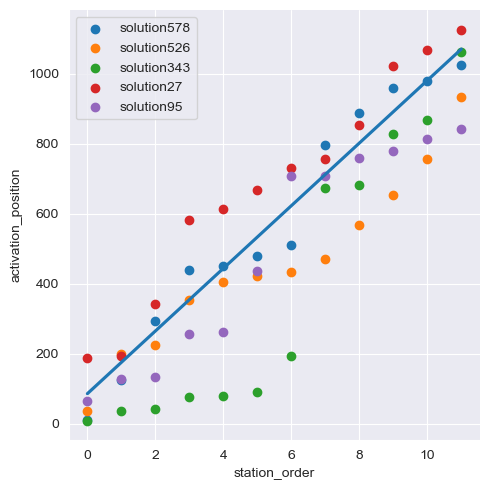

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
import random
sns.lmplot(data=XY, x='station_order', y='activation_position', scatter=False)
s = XY.sample(200)

# for s in range(solutions):
# for s in XY.solution.unique().sample(5):
for s in random.choices(XY.solution.unique(), k=5):
    g = XY[XY.solution==s]
    plt.scatter(g.station_order, g.activation_position, label=f'solution{s}')
plt.legend()
plt.show()